In [19]:
from GameOfLife import gol
import numpy as np

In [18]:
gol1 = gol((25,25),seed=0)
gol1.iterate(50, pretty = True)

Iteration 50
* *     * *   * * ooo  *       * * * * *   *   
      *       *         * *       *       *       
      *     * o  oo                *   * *     
        *   *   ooo              * *   *       
*     *           oo            *       *       
*   *   * *         o  oo      *     * * * * * 
*   *   * *         o      o      *             
                  o    o  oo      *       *   
* * * * *         oo  o                *   *   
*   *     *         o  oooo          *   *   
      *           o  o  o  o              * * 
* *   * *       oo  o                    *     
    *                 oo              *     *   
    *           oo  o        * * *     *   *   
  *     * *           o    oo*     *   *   * * 
  *   *     *   oo  o  o  oo  * *   *     * 
  *   *   * * * oo  o  o      o      * *   * 
      *           o  o  ooo  o*   *       * 
* * * * *           oo        o*       *   *   
      * *               o  oo*   * *   *   *   
      *                 o  o  *  

In [20]:
N=1000
board = gol((50, 50),seed=0)
a=[]
for i in range(0,N):
    a.append(board.count())
    board.updateBoard()

num_cells=np.array(a)


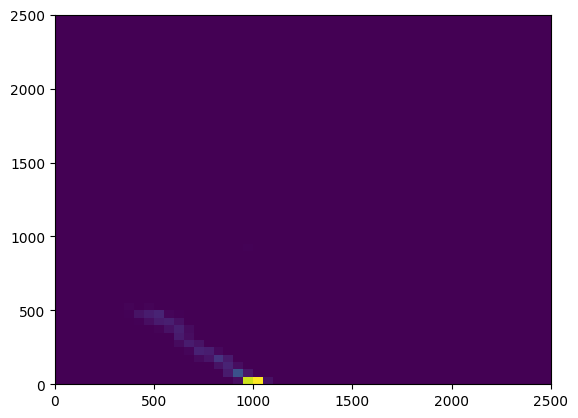

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
*hist2d, _= ax.hist2d(num_cells[:,0],num_cells[:,1],range=[[0,2500],[0,2500]],density = True,bins=50)
plt.savefig('GolHistogram.png')
plt.show()

In [42]:
def getBin(n,edges):
    """
    Entregame el bin en el que pertenece algún valor n
    """
    i = 0
    while n>=edges[i]:
        i +=1
    return i-1

def getP(nA,nB,hist2d):
    """
    Usando la distribución que entrega ax.hist2d, determina la probabilidad de alguna tupla (nA,nB)
    """
    dist, xEdges, yEdges = hist2d
    try:
        xbin = getBin(nA,xEdges)
        ybin = getBin(nB,yEdges)
    except:
        #si fuera de límites, probabilidad es cero
        return 0.0

    return dist[xbin][ybin]

In [43]:
#Metropolis generation for a given mu and c
def metropolis(fun,x0,n,args = None):
  x = [x0]

  # Algoritmo
  while len(x)<n:
    xn = np.random.randint(2500,size = np.size(x0))
    d_S = -np.log(fun(*xn,args)/fun(*x[-1],args))

    if d_S<0:
      x.append(xn)

    elif d_S>0:
      y = np.random.random()

      if y<fun(*xn,args)/fun(*x[-1],args):
        x.append(xn)

      elif y>fun(*xn,args)/fun(*x0,args):
        pass

  return np.array(x)

In [44]:
phi = metropolis(getP,np.random.randint(2500,size=2),1000,args = hist2d)

/tmp/ipykernel_1124/1126403177.py:8: RuntimeWarning: invalid value encountered in scalar divide
  d_S = -np.log(fun(*xn,args)/fun(*x[-1],args))
/tmp/ipykernel_1124/1126403177.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  d_S = -np.log(fun(*xn,args)/fun(*x[-1],args))
/tmp/ipykernel_1124/1126403177.py:8: RuntimeWarning: divide by zero encountered in log
  d_S = -np.log(fun(*xn,args)/fun(*x[-1],args))
/tmp/ipykernel_1124/1126403177.py:19: RuntimeWarning: invalid value encountered in scalar divide
  elif y>fun(*xn,args)/fun(*x0,args):
/tmp/ipykernel_1124/1126403177.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  elif y>fun(*xn,args)/fun(*x0,args):


In [48]:

plt.hist2d(phi[:,0],phi[:,1],range=[[0,2500],[0,2500]],density = True,bins=50)
plt.savefig('metropolisHistogram.png')
plt.show()